In [17]:
import pandas as pd

# Load the raw data
ames_data = pd.read_csv('ames.csv')



FEATURE ENGINEERING

Overview da estrutura do projeto:
1. Tratamento de Dados Ausentes
2. One-Hot Encoding
3. Feature Engineering
4. Modelos e Comparação
5. Interpretação dos Resultados

In [18]:
# Analisar dados ausentes
missing_values = ames_data.isnull().sum()
missing_percent = (missing_values / len(ames_data)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
}).sort_values(by='Missing Values', ascending=False)

missing_summary


,Missing Values,Percentage (%)
Pool.QC,2917,99.556314
Misc.Feature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
Mas.Vnr.Type,1775,60.580205
...,...,...
PID,0,0.000000
Central.Air,0,0.000000
X1st.Flr.SF,0,0.000000
X2nd.Flr.SF,0,0.000000


In [20]:
#tratando colunas com alta porcentagem de valores ausentes

ames_data['Pool.QC'] = ames_data['Pool.QC'].fillna('No Pool')
ames_data['Misc.Feature'] = ames_data['Misc.Feature'].fillna('None')
ames_data['Alley'] = ames_data['Alley'].fillna('No Alley')
ames_data['Fence'] = ames_data['Fence'].fillna('No Fence')
ames_data['Fireplace.Qu'] = ames_data['Fireplace.Qu'].fillna('No Fireplace')

ames_data['Lot.Frontage'] = ames_data['Lot.Frontage'].fillna(ames_data['Lot.Frontage'].median())

missing_values_after = ames_data.isnull().sum()
missing_summary_after = pd.DataFrame({
    'Missing Values': missing_values_after,
    'Percentage (%)': (missing_values_after / len(ames_data)) * 100
}).sort_values(by='Missing Values', ascending=False)



In [21]:
#variáveis categóricas foram transformadas em representações numéricas usando one-hot encoding,

categorical_columns = ames_data.select_dtypes(include=['object']).columns

ames_data_encoded = pd.get_dummies(ames_data, columns=categorical_columns, drop_first=True)

ames_data_encoded.head()

,Order,PID,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,...,Sale.Type_ConLw,Sale.Type_New,Sale.Type_Oth,Sale.Type_VWD,Sale.Type_WD,Sale.Condition_AdjLand,Sale.Condition_Alloca,Sale.Condition_Family,Sale.Condition_Normal,Sale.Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,False,False,False,False,True,False,False,False,True,False
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,False,False,False,False,True,False,False,False,True,False
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,False,False,False,False,True,False,False,False,True,False
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,False,False,False,False,True,False,False,False,True,False
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,False,False,False,False,True,False,False,False,True,False


In [26]:
#calcular correlação entre o target e suas features

if 'SalePrice' in ames_data_encoded.columns:
    correlations = ames_data_encoded.corr()['SalePrice'].sort_values(ascending=False)

    top_features = correlations.head(16).drop('SalePrice')  # Exclude SalePrice itself

    low_features = correlations.tail(15)

    top_features_summary = pd.DataFrame({
        'Feature': top_features.index,
        'Correlation with SalePrice': top_features.values
    })

    low_features_summary = pd.DataFrame({
        'Feature': low_features.index,
        'Correlation with SalePrice': low_features.values
    })

top_features_summary, low_features_summary

(               Feature  Correlation with SalePrice
 0         Overall.Qual                    0.799262
 1          Gr.Liv.Area                    0.706780
 2          Garage.Cars                    0.647877
 3          Garage.Area                    0.640401
 4        Total.Bsmt.SF                    0.632280
 5          X1st.Flr.SF                    0.621676
 6           Year.Built                    0.558426
 7            Full.Bath                    0.545604
 8       Year.Remod.Add                    0.532974
 9        Garage.Yr.Blt                    0.526965
 10    Foundation_PConc                    0.520966
 11        Mas.Vnr.Area                    0.508285
 12       TotRms.AbvGrd                    0.495474
 13          Fireplaces                    0.474558
 14  BsmtFin.Type.1_GLQ                    0.455326,
                       Feature  Correlation with SalePrice
 0               Sale.Type_WD                    -0.204369
 1        Neighborhood_OldTown                   

In [ ]:
top_features_summary #variáveis mais relevantes para o modelo
low_features_summary # variãveis menos relevantes

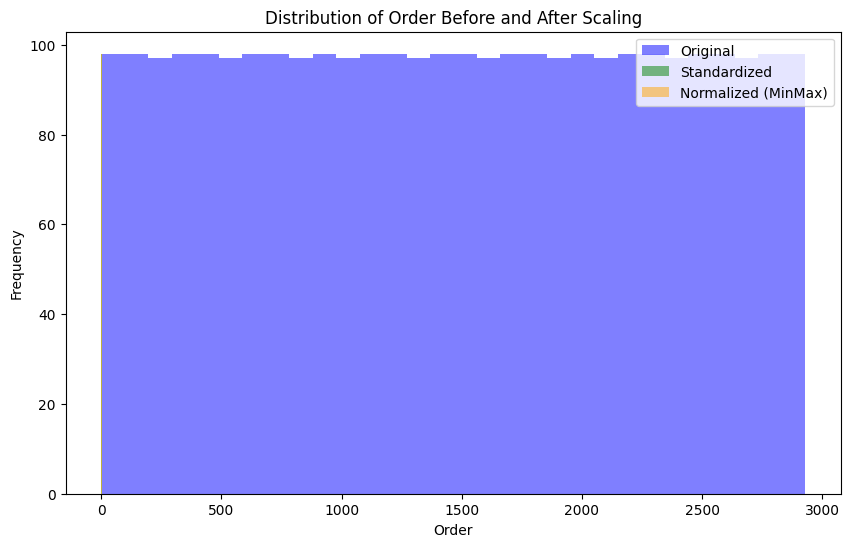

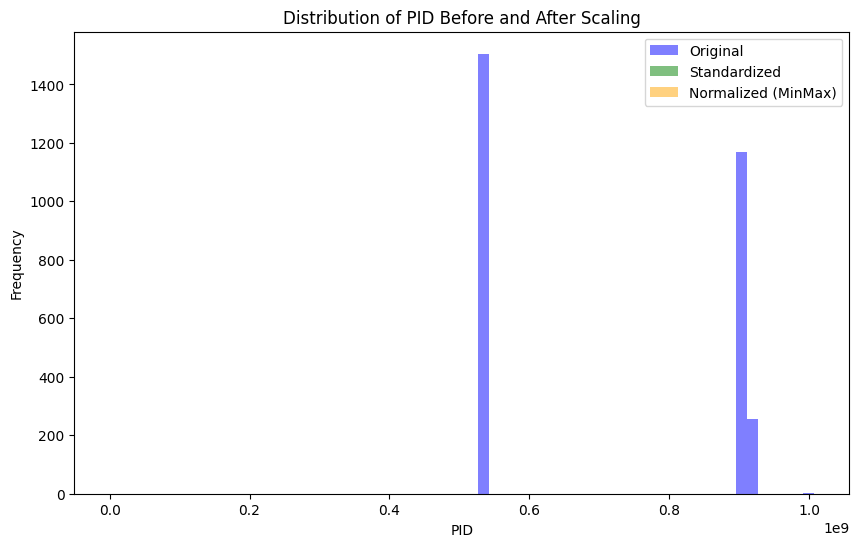

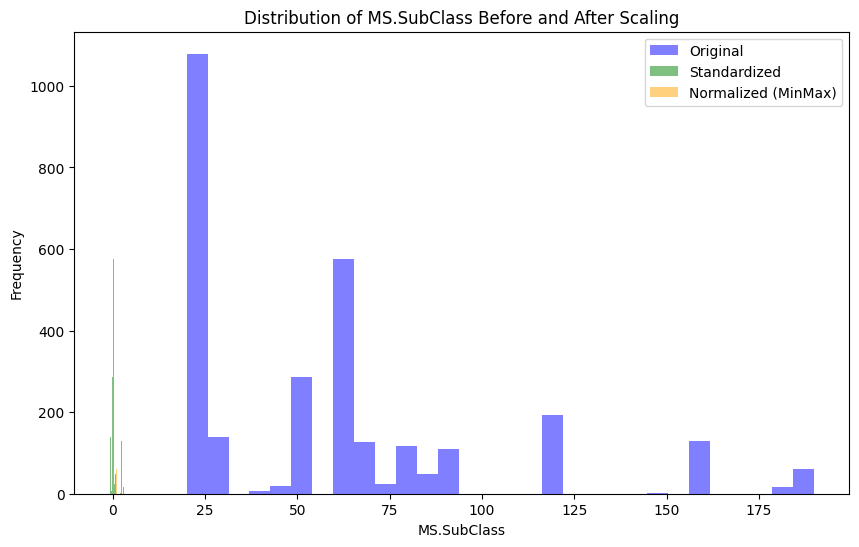

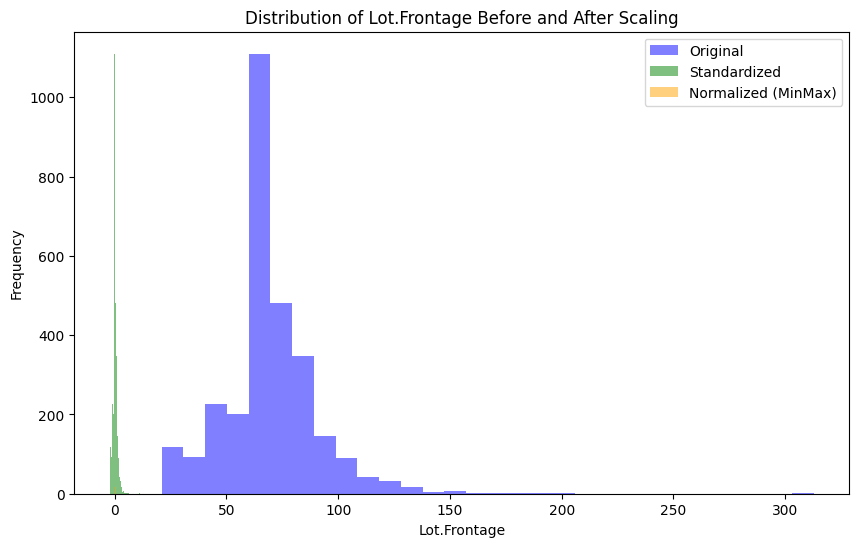

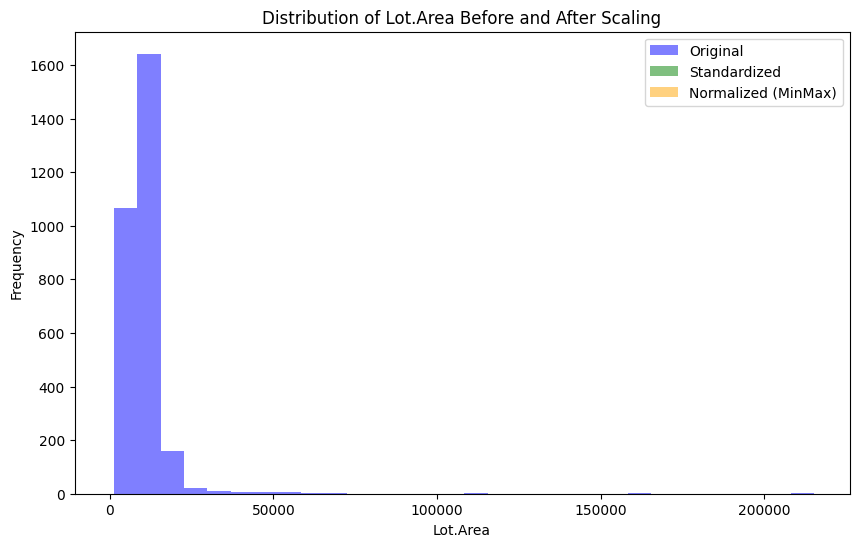

In [29]:
#tratamento da normalidade e normalizacao das features 

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

numerical_columns = ames_data_encoded.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('SalePrice') if 'SalePrice' in numerical_columns else numerical_columns

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

scaled_standard = scaler_standard.fit_transform(ames_data_encoded[numerical_columns])
scaled_minmax = scaler_minmax.fit_transform(ames_data_encoded[numerical_columns])

sample_columns = numerical_columns[:5] 

for column in sample_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(ames_data_encoded[column], bins=30, alpha=0.5, label='Original', color='blue')
    plt.hist(scaled_standard[:, numerical_columns.get_loc(column)], bins=30, alpha=0.5, label='Standardized', color='green')
    plt.hist(scaled_minmax[:, numerical_columns.get_loc(column)], bins=30, alpha=0.5, label='Normalized (MinMax)', color='orange')
    plt.title(f"Distribution of {column} Before and After Scaling")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [ ]:
#é importante ajustar a escala porque uma variável tem uma escala muito maior que outra. Por exemplo, Lot.Area pode variar de centenas a dezenas de milhares, enquanto Overall.Qual varia de 1 a 10. E a regressao linear, por exemplo,  pode ter dificuldade em encontrar o ótimo global se as variáveis não forem ajustadas.
#Os dados têm escalas variadas. Variáveis como Lot.Area possuem distribuições muito diferentes de Year.Built ou Overall.Qual.

# Criação de novas features e o motivo de sua relevância
1. Price per Lot Area (Price_per_LotArea) -> Calcula o preço por unidade de área do terreno (Preço de Venda / Área do Lote).
Métrica usada no mercado imobiliário 
Essa feature pode capturar variações que Lot.Area isoladamente não mostra.

2. House Age at Sale (House_Age) -> Mede a idade da casa no momento da venda (Ano da Venda - Ano de Construção).
Adiciona uma perspectiva temporal importante, que não é capturada diretamente pelo ano de construção.
Casas mais antigas podem necessitar de maior manutenção e serem menos valorizadas ou algumas casas históricas ou muito bem preservadas podem ter alta valorização.

3.  Years Since Last Remodel (Years_Since_Remodel) -> Mede o tempo desde a última reforma (Ano da Venda - Ano da Última Reforma).
Ajuda a distinguir entre propriedades antigas reformadas recentemente e aquelas sem reformas por décadas.

4.  Total Square Footage (Total_Square_Footage) -> Soma a área utilizável acima do solo e do porão (Área de Vida + Área Total do Porão).
O tamanho total utilizável é um fator determinante no preço de imóveis.

In [30]:
# Feature 1: Price per Lot Area (SalePrice / Lot.Area)
ames_data_encoded['Price_per_LotArea'] = ames_data_encoded['SalePrice'] / ames_data_encoded['Lot.Area']

# Feature 2: Age of the House at the time of Sale (Yr.Sold - Year.Built)
ames_data_encoded['House_Age'] = ames_data_encoded['Yr.Sold'] - ames_data_encoded['Year.Built']

# Feature 3: Years since last remodel (Yr.Sold - Year.Remod.Add)
ames_data_encoded['Years_Since_Remodel'] = ames_data_encoded['Yr.Sold'] - ames_data_encoded['Year.Remod.Add']

# Feature 4: Total square footage (Gr.Liv.Area + Total.Bsmt.SF)
ames_data_encoded['Total_Square_Footage'] = ames_data_encoded['Gr.Liv.Area'] + ames_data_encoded.get('Total.Bsmt.SF', 0)

# Verify the new features
new_features = ['Price_per_LotArea', 'House_Age', 'Years_Since_Remodel', 'Total_Square_Footage']
ames_data_encoded[new_features].describe()

,Price_per_LotArea,House_Age,Years_Since_Remodel,Total_Square_Footage
count,2930.000000,2930.000000,2930.000000,2929.000000
mean,21.537993,36.434130,23.523891,2551.511096
std,12.991460,30.291357,20.858846,804.809626
min,0.898245,-1.000000,-2.000000,334.000000
25%,13.812077,7.000000,4.000000,2004.000000
50%,18.005914,34.000000,15.000000,2452.000000
75%,24.309267,54.000000,42.750000,2995.000000
max,97.482639,136.000000,60.000000,11752.000000


In [32]:
#avaliar correlacao dessas novas features com target

new_features_correlation = ames_data_encoded[['Price_per_LotArea', 'House_Age', 'Years_Since_Remodel', 'Total_Square_Footage', 'SalePrice']].corr()['SalePrice'].drop('SalePrice')

new_features_correlation_summary = pd.DataFrame({
    'Feature': new_features_correlation.index,
    'Correlation with SalePrice': new_features_correlation.values
}).sort_values(by='Correlation with SalePrice', ascending=False)

new_features_correlation_summary

,Feature,Correlation with SalePrice
3,Total_Square_Footage,0.789967
0,Price_per_LotArea,0.287615
2,Years_Since_Remodel,-0.534940
1,House_Age,-0.558907


Features mais relevantes:
1. Total_Square_Footage (Correlação: 0.79), forte correlação positiva com SalePrice.
2. Price_per_LotArea (Correlação: 0.29),  correlação moderada positiva.

Features com Correlação Negativa:
1. House_Age (Correlação: -0.56) -> Mostra que casas mais antigas tendem a ter preços menores
2. Years_Since_Remodel (Correlação: -0.53) -> Indica que reformas recentes aumentam o valor do imóvel.

Análise com os seguintes modelos:

1. Regressão Linear Simples: modelo básico que serve como linha de base
2. Regressão Ridge: ajuda na seleção de features relevantes ao penalizar coeficientes irrelevantes.
3. Árvores de Decisão: útil para explorar a importância das features.
4. Random Forest: reduz overfitting ao combinar múltiplas árvores
5. Gradient Boosting Machines (GBMs): bom desempenho para regressão

Além da análise, será feita a normalização das features numéricas para modelos baseados em distância, como o Ridge, Lasso, GBMs, com o StandardScaler

As métricas de avaliação escolhidas foram R² (útil para comparar modelos em termos de capacidade explicativa global)e o RMSE (Dá uma visão clara da precisão do modelo em unidades reais). Ambas se complementam.

In [34]:
# Pipeline com os modelos, incluindo a comparação de feature importance do Random Forest

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

target = 'SalePrice'
features = ['Total_Square_Footage', 'Price_per_LotArea', 'House_Age', 'Years_Since_Remodel']
correlated_features = ['Overall.Qual', 'Gr.Liv.Area', 'Garage.Cars', 'Garage.Area']
features += correlated_features

X = ames_data_encoded[features]
y = ames_data_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for col in X_train.columns[X_train.isnull().any()]:
    median_value = X_train[col].median()
    X_train[col].fillna(median_value, inplace=True)
    X_test[col].fillna(median_value, inplace=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

param_grid = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.01, 0.1, 1.0]},
    'Decision Tree': {'max_depth': [5, 10, 20]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [10, 20]}
}

results = []
feature_importances = None

for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_root_mean_squared_error')
        grid.fit(X_train_scaled, y_train)
        best_model = grid.best_estimator_
    else:
        model.fit(X_train_scaled, y_train)
        best_model = model
    
    y_pred = best_model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R²': r2,
        'Best Params': grid.best_params_ if name in param_grid else None
    })
    
    if name == 'Random Forest':
        feature_importances = pd.DataFrame({
            'Feature': features,
            'Importance': best_model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

results_df = pd.DataFrame(results).sort_values(by='RMSE')


/var/folders/gr/17lh1v9d3px64cp7dr5t57yr0000gp/T/ipykernel_23252/3557783360.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_value, inplace=True)
/var/folders/gr/17lh1v9d3px64cp7dr5t57yr0000gp/T/ipykernel_23252/3557783360.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [37]:
feature_importances #esse df fornece informações sobre a importância relativa de cada feature no modelo.
#Ele apresenta as duas features mais relevantes
# -> Overall.Qual (49.6%)
# -> Total_Square_Footage (32.4%)


,Feature,Importance
4,Overall.Qual,0.496241
0,Total_Square_Footage,0.324004
1,Price_per_LotArea,0.046486
2,House_Age,0.042530
5,Gr.Liv.Area,0.034519
7,Garage.Area,0.024209
3,Years_Since_Remodel,0.023356
6,Garage.Cars,0.008655


In [35]:
results_df # com esse df podemos concluir que o Random Forest foi o melhor modelo, com o menor RMSE (26,689) e o maior R² (0.91) e o Decision Tree teve o pior desempenho  devido à sua tendência a overfitting em pequenas profundidades.

,Model,RMSE,R²,Best Params
4,Random Forest,26689.713752,0.911152,"{'max_depth': 20, 'n_estimators': 100}"
2,Lasso Regression,39771.603967,0.802710,{'alpha': 1.0}
0,Linear Regression,39771.630717,0.802710,None
1,Ridge Regression,39799.143792,0.802437,{'alpha': 10.0}
3,Decision Tree,40232.349506,0.798113,{'max_depth': 5}


Treinando o melhor modelo no conjunto de treinamento e medir o desempenho no
conjunto de teste, para estimar o desempenho de generalização do modelo. 

In [38]:

best_random_forest = RandomForestRegressor(
    random_state=42, 
    max_depth=20, 
    n_estimators=100
)

# Train the model on the training set
best_random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred = best_random_forest.predict(X_test_scaled)

# Evaluate performance on the test set
final_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
final_r2 = r2_score(y_test, y_test_pred)

# Results summary
final_results = {
    'Final RMSE': final_rmse,
    'Final R²': final_r2
}

final_results

/Users/elorr/Workspace/ML/ames2/ames2/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'Final RMSE': np.float64(26689.71375153857), 'Final R²': 0.911152284179932}

Quais as consequências do desempenho do modelo final para a aplicação de negócios?

O modelo prevê os preços dos imóveis com um erro médio de 26,689, o que pode ser considerado pequeno em mercados onde os imóveis têm valores elevados.
Ele também revelou que a qualidade geral do imóvel e tamanho total utilizável são os principais fatores que influenciam o preço.
O modelo fornece uma base sólida para suportar decisões de negócios no mercado imobiliário. Ele permite previsões precisas, identifica fatores-chave que influenciam os preços e ajuda a melhorar estratégias de compra, venda e investimento.

Quais features são mais importantes na determinação do preço do imóvel? 

De acordo com o nosso df feature_importances, as duas features mais importantes são: Overall.Qual (Qualidade geral da construção), Total_Square_Footage (Tamanho total utilizável). A primeira tem importância de 49.6% e a segunda tem de 32.4%.

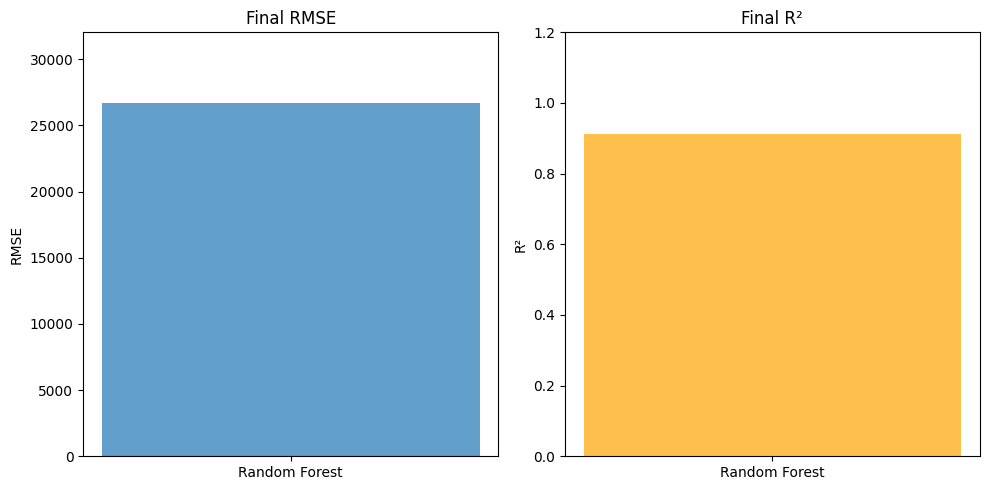

In [40]:
#Gráficos com as métricas do modelo Random Forest.

final_results_df = pd.DataFrame([final_results])

final_results_df['Model'] = ['Random Forest']

final_results_df = final_results_df[['Model', 'Final RMSE', 'Final R²']]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(final_results_df['Model'], final_results_df['Final RMSE'], alpha=0.7)
plt.title('Final RMSE')
plt.ylabel('RMSE')
plt.ylim(0, max(final_results_df['Final RMSE']) * 1.2)

plt.subplot(1, 2, 2)
plt.bar(final_results_df['Model'], final_results_df['Final R²'], alpha=0.7, color='orange')
plt.title('Final R²')
plt.ylabel('R²')
plt.ylim(0, 1.2)

plt.tight_layout()
plt.show()



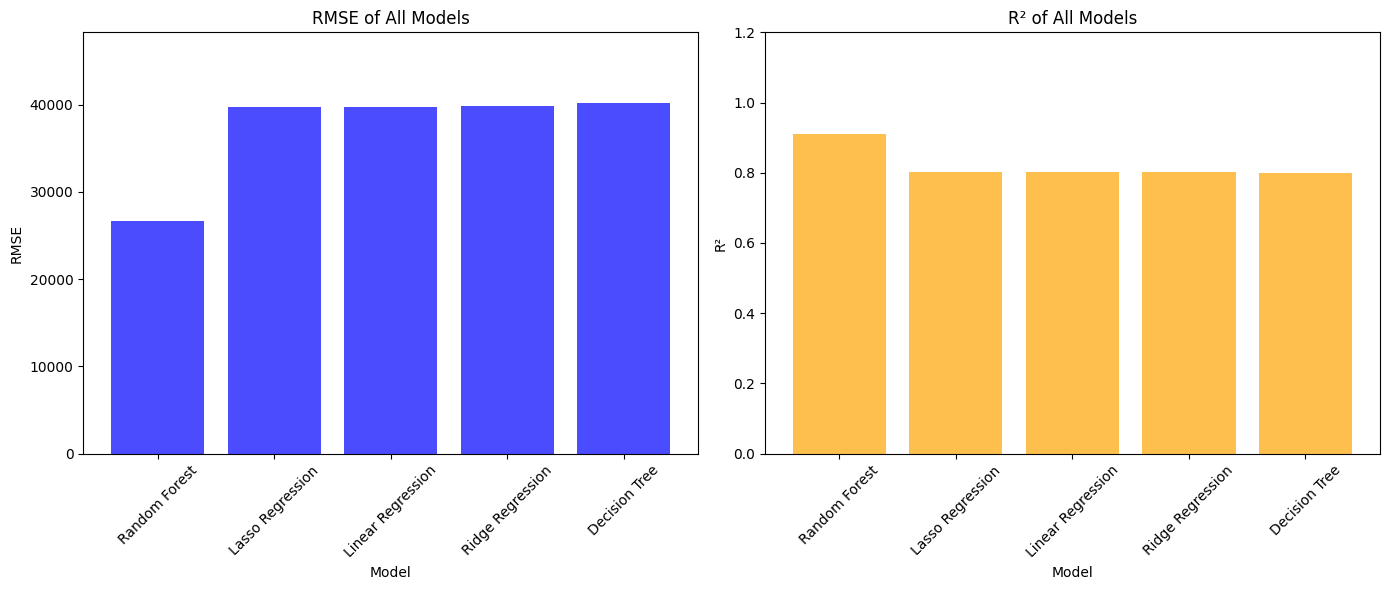

In [42]:
#Gráficos com as métricas de todos os modelos.

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(results_df['Model'], results_df['RMSE'], alpha=0.7, color='blue') #Valores menores indicam melhor precisão.
plt.title('RMSE of All Models')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, max(results_df['RMSE']) * 1.2)

plt.subplot(1, 2, 2)
plt.bar(results_df['Model'], results_df['R²'], alpha=0.7, color='orange') #Valores mais próximos de 1 indicam maior capacidade de explicação dos dados.
plt.title('R² of All Models')
plt.ylabel('R²')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1.2)

plt.tight_layout()
plt.show()